# Environment I (0.5-quantile)

In this notebook, we test the upper bound of prob of error.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.BAI_FixedBudget import *
from codes.Environment import Mixture_AbsGau, setup_env, Exp
from codes.SimulatedGames import simulate
from codes.plots import *

%matplotlib inline

In [2]:

# setting
results = defaultdict(dict)
num_exper = 1
epsilon = 0


m = 1 # number of recommendation
tau = 0.5 # quantile level

if m == 1:
  budget_list = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
  budget_list = [35000, 37500, 40000]
elif m == 5:
  budget_list = [1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000]
  budget_list = [50000, 75000, 100000]

# output/plot setting

output_file = '../Group_One_'  + 'm' + str(m) + '_exper_' + str(num_exper) + '_' + 'budget_' + str(budget_list[0]) + '_' + str(budget_list[-1]) 
budget_plot_title = 'BAI with '+ str(tau) + ' quantile (m=' + str(m) + ')'

In [5]:
# Reward Hist Plot

# base_environment = [
#     {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
#                      ],
#      Exp: [[1/4]]
#     } # mu1, sigma1, mu2, sigma2, p
    
# ]

# base_rewards_env, base_true_ss_dict, base_samples = setup_env(base_environment, ['quantile_' + str(tau)])
# plot_hist(base_samples)

In [4]:
# environment

environment_m1 = [
    {Mixture_AbsGau: [[0, 0.1, 0,1, 1], 
                      # [3.5, 2, 0, 1, 1], 
                      # [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      # [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 0.1, 0,1, 1],  
                      [0, 0.1, 0,1, 1],  
                      [0, 0.1, 0,1, 1],  
                      [0, 0.1, 0,1, 1],  
                      [0, 0.1, 0,1, 1],  
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1],  
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1],  
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1],  
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1], 
                      # [0, 2, 0,1, 1],  
                      # [0, 2, 0,1, 1],  
                     ],
     Exp: [[6], #[1/4], [1/4], [1/4], [1/4]
     ]
    } # mu1, sigma1, mu2, sigma2, p  
]

environment_m5 = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], [1/4], [1/4], [1/4], [1/4]]
    } # mu1, sigma1, mu2, sigma2, p  
]

if m == 1:
  environments = environment_m1
elif m == 5:
  environments = environment_m5
else: 
  print('Unknown environment!')

rewards_env, true_ss_dict, samples, L = setup_env(environments, ['quantile_' + str(tau)])
# true_ss_dict

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 0.1, 0, 1, 1], [0, 0.1, 0, 1, 1], [0, 0.1, 0, 1, 1], [0, 0.1, 0, 1, 1], [0, 0.1, 0, 1, 1], [0, 0.1, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[6]]}


In [5]:
# run experiments

def run_exper(rewards_env, summary_stats, policy, epsilon, m, budget, num_exper, 
              fixed_samples_list = None, L = None):
    for key in rewards_env.keys():
        name = key + '_' + str(num_exper)
        policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
        subname = policy_name  + str(budget) 
        p = IntProgress(max = num_exper)
        p.description = 'Running'
        display(p)
        results[name][subname] = []

        result = simulate(rewards_env[key],summary_stats[key], policy, 
                epsilon, m, budget, num_exper, p, fixed_samples_list, L)
        results[name][subname].append(result)

In [6]:
for budget in budget_list:
    # run_exper(rewards_env, true_ss_dict, Q_SR, epsilon, m, budget, num_exper)
    run_exper(rewards_env, true_ss_dict, Q_SAR_Simplified, epsilon, m, budget, num_exper, L=L)
    # run_exper(rewards_env, true_ss_dict, batch_elimination, epsilon, m, budget, num_exper)
    # run_exper(rewards_env, true_ss_dict, uniform_sampling, epsilon, m, budget, num_exper)

IntProgress(value=0, description='Running', max=1)

sorted delta list:  [0.0500802  0.05006794 0.04970461 0.04934326 0.04928179 0.04924325
 0.04924325]
H:  2474.3308113687235
prob error bound:  42.109960623924636


IntProgress(value=0, description='Running', max=1)

sorted delta list:  [0.0500802  0.05006794 0.04970461 0.04934326 0.04928179 0.04924325
 0.04924325]
H:  2474.3308113687235
prob error bound:  39.64392519107984


IntProgress(value=0, description='Running', max=1)

sorted delta list:  [0.0500802  0.05006794 0.04970461 0.04934326 0.04928179 0.04924325
 0.04924325]
H:  2474.3308113687235
prob error bound:  37.32230525200282


Budget  Probability of Error  std Policy
0  35000                   0.0  0.0  Q-SAR
1  37500                   0.0  0.0  Q-SAR
2  40000                   0.0  0.0  Q-SAR
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


,Budget,Probability of Error,std,Policy
0,35000,0.0,0.0,Q-SAR
1,37500,0.0,0.0,Q-SAR
2,40000,0.0,0.0,Q-SAR


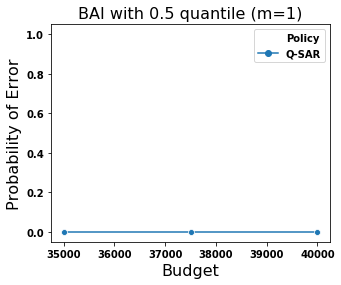

In [7]:
# save results

# with open(output_file, 'wb') as handle:
#      pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot_eva_budget(results, 'pe', paper_flag = True, with_para = True, title = budget_plot_title, log_scale = False)